In [1]:
import numpy as np
import pandas as pd
from functools import reduce
import os
import statsmodels.api as sm

# Market Data for US

In [2]:
df_CRSP_market_daily=pd.read_csv('../data/CRSP/CRSP Daily Index Built on Market Capitalization.csv',\
index_col=0,parse_dates=True)

In [3]:
df_CRSP_market_daily

,vwretd,veretx,ewretd,ewretx,totval,totcnt,usdval,usdcnt,spindx,sprtrn
Date,,,,,,,,,,
2000-01-03,-0.006803,-0.006810,0.002878,0.002860,16897673600,8358,17013544200,8357,1455.22,-0.009549
2000-01-04,-0.039652,-0.039679,-0.017465,-0.017486,16228867700,8359,16897669000,8357,1399.42,-0.038345
2000-01-05,-0.000935,-0.001009,0.007821,0.007743,16212787400,8360,16228817900,8356,1402.11,0.001922
2000-01-06,-0.007391,-0.007547,0.004504,0.004453,16089055800,8358,16199203000,8358,1403.45,0.000956
2000-01-07,0.032516,0.032514,0.017008,0.016991,16610768100,8353,16087694900,8353,1441.47,0.027090
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.002332,0.002197,-0.000277,-0.000458,49387699400,7515,49278049200,7515,3703.06,0.003537
2020-12-28,0.003870,0.003859,0.001350,0.001304,49579392700,7516,49387699400,7514,3735.36,0.008723
2020-12-29,-0.003649,-0.003657,-0.008483,-0.008656,49396998600,7522,49576731700,7514,3727.04,-0.002227


In [4]:
df_CRSP_riskfree_monthly=pd.read_csv('../data/CRSP/CRSP Risk Free Rates.csv',\
index_col=4,parse_dates=True)

In [5]:
df_CRSP_riskfree_monthly

,KYTREASNOX,TIDXFAM,TTERMTYPE,TTERMLBL,RMTREASNO,RMCRSPID,TMBIDYTM,TMASKYTM,TMYTM,TMDURATN
MCALDT,,,,,,,,,,
2000-01-31,2000001,RISKFREE,30,CRSP Risk Free Rates - 1-Month (Nominal),203118,20000302.4,5.3900,5.3800,5.3900,31
2000-02-29,2000001,RISKFREE,30,CRSP Risk Free Rates - 1-Month (Nominal),203122,20000330.4,5.3200,5.3100,5.3100,30
2000-03-31,2000001,RISKFREE,30,CRSP Risk Free Rates - 1-Month (Nominal),203133,20000504.4,5.8600,5.8500,5.8600,34
2000-04-28,2000001,RISKFREE,30,CRSP Risk Free Rates - 1-Month (Nominal),203141,20000601.4,5.2800,5.2600,5.2700,34
2000-05-31,2000001,RISKFREE,30,CRSP Risk Free Rates - 1-Month (Nominal),203149,20000706.4,4.6800,4.6700,4.6700,36
...,...,...,...,...,...,...,...,...,...,...
2020-08-31,2000002,RISKFREE,90,CRSP Risk Free Rates - 3-Month (Nominal),207541,20201127.4,0.1060,0.0963,0.1010,88
2020-09-30,2000002,RISKFREE,90,CRSP Risk Free Rates - 3-Month (Nominal),207571,20201229.4,0.0913,0.0811,0.0862,90
2020-10-30,2000002,RISKFREE,90,CRSP Risk Free Rates - 3-Month (Nominal),207468,20210128.4,0.0913,0.0862,0.0887,90


In [6]:
df_AQR_risk_free_daily=pd.read_excel('../data/AQR Data/Betting Against Beta Equity Factors Daily.xlsx',\
sheet_name='RF',header=18,index_col=0,parse_dates=True)

In [7]:
df_AQR_risk_free_daily

,Risk Free Rate
DATE,
1926-07-31,0.000106
1926-08-02,0.000120
1926-08-03,0.000120
1926-08-04,0.000120
1926-08-05,0.000120
...,...
2020-12-25,0.000003
2020-12-28,0.000003
2020-12-29,0.000003


# Single Stock Data

In [216]:
df_one_day_one_stock=pd.read_csv('../data/US Stocks Data/alpha_vantage_clean_all/ADILW.txt',header=None,\
            names=['Date','Open','High','Low','Close','Volume'],index_col=0,parse_dates=True)

In [217]:
df_one_day_one_stock.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-02-16,0.9300,0.949899,0.7554,0.8500,23463.0
2021-02-17,0.9400,0.990000,0.8162,0.8162,28222.0
2021-02-18,0.9870,0.990000,0.8200,0.9798,10719.0
2021-02-19,0.8505,0.860100,0.8300,0.8600,8451.0
2021-02-22,0.8300,0.889999,0.8300,0.8301,5853.0


In [218]:
df_one_day_one_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 450 entries, 2018-07-27 to 2021-02-22
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    450 non-null    float64
 1   High    450 non-null    float64
 2   Low     450 non-null    float64
 3   Close   450 non-null    float64
 4   Volume  450 non-null    float64
dtypes: float64(5)
memory usage: 21.1 KB


In [219]:
df_return=(np.log(df_one_day_one_stock[['Close']])-np.log(df_one_day_one_stock[['Close']]).shift(1))[1:]
df_return.columns=['total_ret']

## Merge all required data

In [239]:
dfs=[df_return,df_AQR_risk_free_daily,df_CRSP_market_daily[['vwretd']]]

In [240]:
df_one_stock_return_merged=reduce(lambda x,y:pd.merge(x,y,left_index=True, right_index=True),dfs)

In [241]:
df_one_stock_return_merged.tail()

,total_ret,Risk Free Rate,vwretd
2020-12-24,-0.074108,0.000003,0.002332
2020-12-28,0.025318,0.000003,0.003870
2020-12-29,-0.100373,0.000003,-0.003649
2020-12-30,0.075055,0.000003,0.003281
2020-12-31,0.000000,0.000003,0.003556


In [242]:
df_one_stock_return_merged.total_ret =df_one_stock_return_merged.total_ret-\
df_one_stock_return_merged['Risk Free Rate']
df_one_stock_return_merged.vwretd =df_one_stock_return_merged.vwretd-\
df_one_stock_return_merged['Risk Free Rate'] 

In [243]:
df_one_stock_return_merged=df_one_stock_return_merged.rename(columns={'Risk Free Rate':'rf','vwretd':'mkt',
                                                                     'total_ret':'ret'})

In [244]:
df_one_stock_return_merged.tail()

,ret,rf,mkt
2020-12-24,-0.074111,0.000003,0.002329
2020-12-28,0.025315,0.000003,0.003867
2020-12-29,-0.100376,0.000003,-0.003652
2020-12-30,0.075052,0.000003,0.003278
2020-12-31,-0.000003,0.000003,0.003553


## Beta Calculation

### ex ante beta

In [245]:
# Estimate rolling 5 year(1260 trading days) correlations with 
# minimum 750 non-missing datapoints
df_one_stock_return_merged['corr'] = pd.DataFrame(df_one_stock_return_merged['ret'].\
                                                      rolling(1260, min_periods=750).\
             corr(df_one_stock_return_merged['mkt']))
df_one_stock_return_merged['corr'] = df_one_stock_return_merged['corr'].shift(1)

In [246]:
df_one_stock_return_merged

,ret,rf,mkt,corr
2018-07-30,-0.073143,0.000076,-0.005657,NaN
2018-07-31,0.069910,0.000076,0.005458,NaN
2018-08-01,-0.239560,0.000080,-0.001379,NaN
2018-08-02,-0.034793,0.000080,0.005429,NaN
2018-08-03,-0.155720,0.000080,0.003194,NaN
...,...,...,...,...
2020-12-24,-0.074111,0.000003,0.002329,NaN
2020-12-28,0.025315,0.000003,0.003867,NaN
2020-12-29,-0.100376,0.000003,-0.003652,NaN
2020-12-30,0.075052,0.000003,0.003278,NaN


<AxesSubplot:title={'center':'AAME Total Return'}>

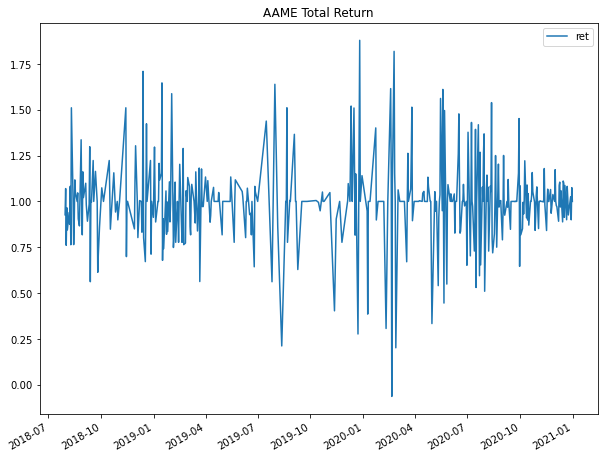

In [228]:
(df_one_stock_return_merged[['ret']]+1).plot(figsize=(10,8),title='AAME Total Return')

In [229]:
(df_one_stock_return_merged[['ret']]+1).sort_values(by='ret')

,ret
2020-02-20,-0.063772
2020-02-27,0.201432
2019-08-12,0.211461
2019-12-23,0.276687
2020-02-10,0.306792
...,...
2019-07-31,1.638872
2019-01-15,1.646454
2018-12-13,1.709584
2020-02-24,1.818517


In [230]:
df_log_return_three_days=np.log(df_one_stock_return_merged[['ret','mkt']]+1).rolling(window=3).sum()

/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [231]:
df_log_return_three_days['corr'] = pd.DataFrame(df_log_return_three_days['ret'].\
                                                      rolling(1260, min_periods=750).\
             corr(df_log_return_three_days['mkt']))
df_log_return_three_days['corr'] = df_log_return_three_days['corr'].shift(1)

<AxesSubplot:>

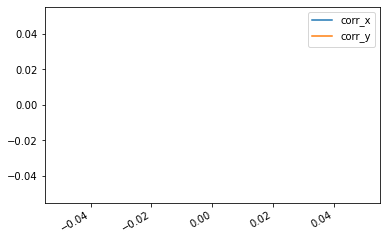

In [232]:
pd.merge(df_log_return_three_days['corr'],df_one_stock_return_merged['corr'],left_index=True,
        right_index=True).dropna().plot()

In [233]:
# use three-day log returns to control for nonsynchronous trading
df_one_stock_return_merged['corr']=df_log_return_three_days['corr']

In [234]:
df_one_stock_return_merged

,ret,rf,mkt,corr
2018-07-30,-0.073143,0.000076,-0.005657,NaN
2018-07-31,0.069910,0.000076,0.005458,NaN
2018-08-01,-0.239560,0.000080,-0.001379,NaN
2018-08-02,-0.034793,0.000080,0.005429,NaN
2018-08-03,-0.155720,0.000080,0.003194,NaN
...,...,...,...,...
2020-12-24,-0.074111,0.000003,0.002329,NaN
2020-12-28,0.025315,0.000003,0.003867,NaN
2020-12-29,-0.100376,0.000003,-0.003652,NaN
2020-12-30,0.075052,0.000003,0.003278,NaN


In [235]:
# same for rolling std, but with 1 year horizon (252 trading days) with 
# minimum 120 non-missing datapoints
df_one_stock_return_merged['i_std'] = pd.DataFrame(df_one_stock_return_merged['ret'].\
                                                      rolling(252, min_periods=120).std())
df_one_stock_return_merged['i_std'] = df_one_stock_return_merged['i_std'].shift(1)

df_one_stock_return_merged['mkt_std'] = pd.DataFrame(df_one_stock_return_merged['mkt'].\
                                                      rolling(252, min_periods=120).std())
df_one_stock_return_merged['mkt_std'] = df_one_stock_return_merged['mkt_std'].shift(1)

In [236]:
df_one_stock_return_merged

,ret,rf,mkt,corr,i_std,mkt_std
2018-07-30,-0.073143,0.000076,-0.005657,NaN,NaN,NaN
2018-07-31,0.069910,0.000076,0.005458,NaN,NaN,NaN
2018-08-01,-0.239560,0.000080,-0.001379,NaN,NaN,NaN
2018-08-02,-0.034793,0.000080,0.005429,NaN,NaN,NaN
2018-08-03,-0.155720,0.000080,0.003194,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-12-24,-0.074111,0.000003,0.002329,NaN,0.245904,0.016121
2020-12-28,0.025315,0.000003,0.003867,NaN,0.244903,0.016105
2020-12-29,-0.100376,0.000003,-0.003652,NaN,0.244856,0.016104
2020-12-30,0.075052,0.000003,0.003278,NaN,0.244923,0.016107


In [237]:

#drop all the rows where in ANY column there is a NAN value
df_one_stock_return_merged = df_one_stock_return_merged.dropna(how='any')
# Estimation betas like on page 8 in eq (14) in the paper
df_one_stock_return_merged['beta_est'] = df_one_stock_return_merged['corr']*\
df_one_stock_return_merged['i_std'].div(df_one_stock_return_merged['mkt_std'])
#Shrink the betas to make them less noisy eq(15)
df_one_stock_return_merged['beta_est'] = 0.6*df_one_stock_return_merged['beta_est'] + 0.4

<AxesSubplot:>

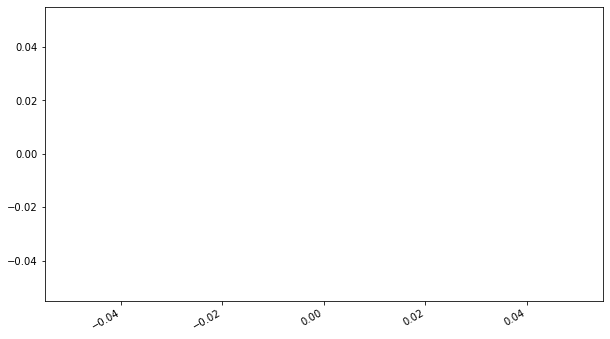

In [238]:
df_one_stock_return_merged.beta_est.plot(figsize=(10,6))

# All stocks

## First trial, not available for large dataset with daily data

In [50]:
df_all=pd.DataFrame(columns=['Ticker','Close'])

In [444]:
for filename in os.listdir(data_folder_path)[:500]:
    if 'txt' in filename:
        df_one_day_one_stock=pd.read_csv(data_folder_path+filename,header=None,\
            names=['Date','Open','High','Low','Close','Volume'],index_col=0,parse_dates=True)
        df_return=(np.log(df_one_day_one_stock)-np.log(df_one_day_one_stock).shift(1))[1:][['Close']]
        df_return['Ticker'] = ''.join(filename.split('.')[:-1])
        
        df_all=df_all.append(df_return)

In [445]:
df_all = df_all.rename(columns={'Close':'total_ret'})

In [446]:
df_all

,Ticker,total_ret
2020-12-22,CONXW,0.117319
2020-12-23,CONXW,0.061930
2020-12-24,CONXW,-0.068993
2020-12-28,CONXW,-0.011050
2020-12-29,CONXW,-0.011173
...,...,...
2020-12-24,BSBK,-0.011924
2020-12-28,BSBK,-0.006565
2020-12-29,BSBK,-0.012148
2020-12-30,BSBK,0.006645


In [447]:
dfs=[df_all,df_AQR_risk_free_daily,df_CRSP_market_daily[['vwretd']]]

In [448]:
df_all_stock_return_merged=reduce(lambda x,y:pd.merge(x,y,left_index=True, right_index=True),dfs)

In [450]:
df_all_stock_return_merged.total_ret =df_all_stock_return_merged.total_ret-\
df_all_stock_return_merged['Risk Free Rate']
df_all_stock_return_merged.vwretd =df_all_stock_return_merged.vwretd-\
df_all_stock_return_merged['Risk Free Rate'] 

In [451]:
df_all_stock_return_merged=df_all_stock_return_merged.rename(columns={'Risk Free Rate':'rf','vwretd':'mkt',
                                                                     'total_ret':'ret'})

In [452]:
df_all_stock_return_merged

,Ticker,ret,rf,mkt
2005-01-04,GTSI,-0.053725,0.000087,-0.012892
2005-01-04,AROW,-0.012510,0.000087,-0.012892
2005-01-04,EPIQ,-0.017776,0.000087,-0.012892
2005-01-04,ARMH,0.004776,0.000087,-0.012892
2005-01-04,KMB,0.000749,0.000087,-0.012892
...,...,...,...,...
2020-12-31,KF,0.002975,0.000003,0.003553
2020-12-31,OAS,0.007804,0.000003,0.003553
2020-12-31,AFGE,-0.001455,0.000003,0.003553
2020-12-31,POWL,0.006624,0.000003,0.003553


In [453]:

# define function to estimate rolling 5 year(60 month) correlations with minimum 36 non-missing datapoints
def roll_corr(x):
    return pd.DataFrame(x['ret'].rolling(60, min_periods=36).corr(x['mkt']))


#same for rolling std, but with 1 year horizon
def roll_var(x):
    return pd.DataFrame(x['ret'].rolling(252, min_periods=120).std())

Daily data is too much, need to change a method for alpha calculation

## Second Trial

### Focus on One Day

In [214]:
data_folder_path = '../data/US Stocks Data/alpha_vantage_clean_all/'
filenames=os.listdir(data_folder_path)
filenames.sort()

In [159]:
def get_ex_ante_beta(filename,df_risk_free,df_market):
    df_one_day_one_stock=pd.read_csv(data_folder_path+filename,header=None,\
            names=['Date','Open','High','Low','Close','Volume'],index_col=0,parse_dates=True)
    with np.errstate(divide='raise'):
        try:
            df_return=(np.log(df_one_day_one_stock[['Close']])-np.log(df_one_day_one_stock[['Close']]).shift(1))[1:]
        except FloatingPointError:
            bad_tickers.append(filename[:-4])
            return pd.DataFrame()
    df_return.columns=['total_ret']
    dfs=[df_return,df_risk_free,df_market]
    df=reduce(lambda x,y:pd.merge(x,y,left_index=True, right_index=True),dfs)
    df.total_ret =df.total_ret-df['Risk Free Rate']
    df.vwretd =df.vwretd-df['Risk Free Rate'] 
    df=df.rename(columns={'Risk Free Rate':'rf','vwretd':'mkt','total_ret':'ret'})
    with np.errstate(invalid='raise'):
        try:
            df_log_return_three_days=np.log(df[['ret','mkt']]+1).rolling(window=3).sum()
        except FloatingPointError:
            df_log_return_three_days=(df[['ret','mkt']]+1).rolling(window=3).apply(np.prod, raw=True)-1
            bad_tickers.append(filename[:-4])
    
    df_log_return_three_days['corr'] = pd.DataFrame(df_log_return_three_days['ret'].\
                                                      rolling(1260, min_periods=750).\
             corr(df_log_return_three_days['mkt']))
    df_log_return_three_days['corr'] = df_log_return_three_days['corr'].shift(1)
    df['corr']=df_log_return_three_days['corr']
    df['i_std'] = pd.DataFrame(df['ret'].rolling(252, min_periods=120).std())
    df['i_std'] = df['i_std'].shift(1)
    df['mkt_std'] = pd.DataFrame(df['mkt'].rolling(252, min_periods=120).std())
    df['mkt_std'] = df['mkt_std'].shift(1)
    df = df.dropna(how='any')
    df['beta_est'] = df['corr']*df['i_std'].div(df['mkt_std'])
    df['beta_est'] = 0.6*df['beta_est'] + 0.4
    return df[['ret','beta_est']]

In [215]:
get_ex_ante_beta('ADILW.txt',df_AQR_risk_free_daily,df_CRSP_market_daily[['vwretd']])

,ret,beta_est


In [177]:
tickers_to_remove=pd.read_csv('../data/US Stocks Data/Bad_ticker_left/bad_ticker_v2.txt',header=None)
tickers_to_remove = tickers_to_remove.values[:,0]

In [178]:
bad_tickers=[]

In [183]:
print('we have excluded {} tickers at the beginning'.format(len(tickers_to_remove)))
print('we have {} bad tickers left'.format(len(bad_tickers)))
print('we have {} tickers‘ beta outputted in total'.format(counter))

we have excluded 216 tickers at the beginning
we have 523 bad tickers left
we have 8984 tickers‘ beta outputted in total


In [143]:
df_one_day_one_stock=pd.read_csv('../data/US Stocks Data/alpha_vantage_clean_all/AACG.txt',header=None,\
            names=['Date','Open','High','Low','Close','Volume'],index_col=0,parse_dates=True)

In [144]:
unite_dates_index=df_one_day_one_stock.index

In [145]:
unite_dates_index[0]

Timestamp('2008-01-29 00:00:00')

In [146]:
x = df_one_stock_return_merged['mkt'].copy()
x = sm.add_constant(x)
results = sm.OLS(df_one_stock_return_merged['ret'], x).fit(cov_type='HC1')

In [147]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.002   
Dependent Variable: ret              AIC:                -65.5115
Date:               2021-02-24 00:20 BIC:                -57.4550
No. Observations:   415              Log-Likelihood:     34.756  
Df Model:           1                F-statistic:        1.552   
Df Residuals:       413              Prob (F-statistic): 0.214   
R-squared:          0.004            Scale:              0.049760
-------------------------------------------------------------------
            Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
-------------------------------------------------------------------
const      -0.0031     0.0113   -0.2746   0.7836   -0.0252   0.0190
mkt         1.0435     0.8377    1.2457   0.2129   -0.5984   2.6855
-----------------------------------------------------------------
Omnibus:             41.353       Durbin-Watson:          2.342  
Prob(Omnibus):       0.000        Jarque-Bera (JB):       232.692
Skew:                0.009        Prob(JB):               0.000  
Kurtosis:            6.668        Condition No.:          72     
=================================================================

"""

# Portfolio ranking for one day

In [194]:
beta_unit_dates_index=pd.read_pickle('../data/Ex Ante Beta/AAPL.pickle').index

In [250]:
data_folder_path = '../data/Ex Ante Beta/'
filenames=os.listdir(data_folder_path)
filenames.sort()

In [251]:
all_tickers=[filename[:-7] for filename in filenames]

In [252]:
stock_beta_by_ticker_dict={}
for filename in filenames:
    if filename[:-7] not in tickers_to_remove:
        df_ = pd.read_pickle(data_folder_path+filename)
        stock_beta_by_ticker_dict[filename[:-7]]=df_

In [253]:
beta_unit_dates_index[0]

Timestamp('2007-12-31 00:00:00')

In [254]:
df_one_day_beta=pd.DataFrame(index=all_tickers,columns=['ex_ante_beta','ret'])

In [255]:
for filename in filenames:
    #print(filename)
    df_ = stock_beta_by_ticker_dict[filename[:-7]]
    if beta_unit_dates_index[0] in df_.index:
        _=df_.loc[beta_unit_dates_index[0]]
        df_one_day_beta.loc[df_one_day_beta.index==filename[:-7],'ex_ante_beta']=_.beta_est
        df_one_day_beta.loc[df_one_day_beta.index==filename[:-7],'ret']=_.ret

In [256]:
df_one_day_beta = df_one_day_beta.dropna()
df_one_day_beta['q']=df_one_day_beta.apply(lambda x: pd.qcut(x, 10, labels=range(1, 11))).ex_ante_beta
df_one_day_beta.q = df_one_day_beta.q.astype(np.int)
df_one_day_beta.ex_ante_beta = df_one_day_beta.ex_ante_beta.astype(np.float)
df_one_day_beta.ret = df_one_day_beta.ret.astype(np.float)

In [257]:
df_one_day_beta.groupby(['q']).mean()

,ex_ante_beta,ret
q,,
1,0.497781,0.006843
2,0.663813,0.002715
3,0.770406,-0.002543
4,0.846745,-0.002595
5,0.909149,-0.003503
6,0.968206,-0.003378
7,1.024075,-0.004795
8,1.091047,-0.006004
9,1.187847,-0.004856


In [258]:
def get_one_day_portfolio(date,stock_beta_by_ticker_dict,filenames):
    df_one_day_beta=pd.DataFrame(index=all_tickers,columns=['ex_ante_beta','ret'])
    for filename in filenames:
        #print(filename)
        df_ = stock_beta_by_ticker_dict[filename[:-7]]
        if date in df_.index:
            _=df_.loc[date]
            df_one_day_beta.loc[df_one_day_beta.index==filename[:-7],'ex_ante_beta']=_.beta_est
            df_one_day_beta.loc[df_one_day_beta.index==filename[:-7],'ret']=_.ret
    df_one_day_beta = df_one_day_beta.dropna()
    df_one_day_beta['q']=df_one_day_beta.apply(lambda x: pd.qcut(x, 10, labels=range(1, 11))).ex_ante_beta
    df_one_day_beta.q = df_one_day_beta.q.astype(np.int)
    df_one_day_beta.ex_ante_beta = df_one_day_beta.ex_ante_beta.astype(np.float)
    df_one_day_beta.ret = df_one_day_beta.ret.astype(np.float)

    return df_one_day_beta.groupby(['q']).mean()

In [259]:
get_one_day_portfolio('2007-12-31',stock_beta_by_ticker_dict,filenames)

,ex_ante_beta,ret
q,,
1,0.497781,0.006843
2,0.663813,0.002715
3,0.770406,-0.002543
4,0.846745,-0.002595
5,0.909149,-0.003503
6,0.968206,-0.003378
7,1.024075,-0.004795
8,1.091047,-0.006004
9,1.187847,-0.004856


In [260]:
beta_unit_dates_index[0]

Timestamp('2007-12-31 00:00:00')

In [261]:
df_P_beta=pd.DataFrame(index=beta_unit_dates_index,columns=np.arange(1,11,1))
df_P_return=pd.DataFrame(index=beta_unit_dates_index,columns=np.arange(1,11,1))

In [262]:
get_one_day_portfolio(beta_unit_dates_index[2],stock_beta_by_ticker_dict,filenames)

,ex_ante_beta,ret
q,,
1,0.479280,0.007726
2,0.639249,0.001886
3,0.750707,-0.004976
4,0.831146,-0.009151
5,0.897401,-0.008060
6,0.958574,-0.011333
7,1.017686,-0.013982
8,1.086234,-0.015851
9,1.184268,-0.015238


In [263]:
for date in beta_unit_dates_index:
    print(date)
    df_=get_one_day_portfolio(date,stock_beta_by_ticker_dict,filenames)
    df_P_beta.loc[date]=df_.groupby(['q']).mean().ex_ante_beta
    df_P_return.loc[date]=df_.groupby(['q']).mean().ret
    df_P_beta.to_pickle('../data/Portfolio Beta and Return Daily/beta.pickle')
    df_P_return.to_pickle('../data/Portfolio Beta and Return Daily/return.pickle')

2007-12-31 00:00:00
2008-01-02 00:00:00
2008-01-03 00:00:00
2008-01-04 00:00:00
2008-01-07 00:00:00
2008-01-08 00:00:00
2008-01-09 00:00:00
2008-01-10 00:00:00
2008-01-11 00:00:00
2008-01-14 00:00:00
2008-01-15 00:00:00
2008-01-16 00:00:00
2008-01-17 00:00:00
2008-01-18 00:00:00
2008-01-22 00:00:00
2008-01-23 00:00:00
2008-01-24 00:00:00
2008-01-25 00:00:00
2008-01-28 00:00:00
2008-01-29 00:00:00
2008-01-30 00:00:00
2008-01-31 00:00:00
2008-02-01 00:00:00
2008-02-04 00:00:00
2008-02-05 00:00:00
2008-02-06 00:00:00
2008-02-07 00:00:00
2008-02-08 00:00:00
2008-02-11 00:00:00
2008-02-12 00:00:00
2008-02-13 00:00:00
2008-02-14 00:00:00
2008-02-15 00:00:00
2008-02-19 00:00:00
2008-02-20 00:00:00
2008-02-21 00:00:00
2008-02-22 00:00:00
2008-02-25 00:00:00
2008-02-26 00:00:00
2008-02-27 00:00:00
2008-02-28 00:00:00
2008-02-29 00:00:00
2008-03-03 00:00:00
2008-03-04 00:00:00
2008-03-05 00:00:00
2008-03-06 00:00:00
2008-03-07 00:00:00
2008-03-10 00:00:00
2008-03-11 00:00:00
2008-03-12 00:00:00


2009-08-17 00:00:00
2009-08-18 00:00:00
2009-08-19 00:00:00
2009-08-20 00:00:00
2009-08-21 00:00:00
2009-08-24 00:00:00
2009-08-25 00:00:00
2009-08-26 00:00:00
2009-08-27 00:00:00
2009-08-28 00:00:00
2009-08-31 00:00:00
2009-09-01 00:00:00
2009-09-02 00:00:00
2009-09-03 00:00:00
2009-09-04 00:00:00
2009-09-08 00:00:00
2009-09-09 00:00:00
2009-09-10 00:00:00
2009-09-11 00:00:00
2009-09-14 00:00:00
2009-09-15 00:00:00
2009-09-16 00:00:00
2009-09-17 00:00:00
2009-09-18 00:00:00
2009-09-21 00:00:00
2009-09-22 00:00:00
2009-09-23 00:00:00
2009-09-24 00:00:00
2009-09-25 00:00:00
2009-09-28 00:00:00
2009-09-29 00:00:00
2009-09-30 00:00:00
2009-10-01 00:00:00
2009-10-02 00:00:00
2009-10-05 00:00:00
2009-10-06 00:00:00
2009-10-07 00:00:00
2009-10-08 00:00:00
2009-10-09 00:00:00
2009-10-12 00:00:00
2009-10-13 00:00:00
2009-10-14 00:00:00
2009-10-15 00:00:00
2009-10-16 00:00:00
2009-10-19 00:00:00
2009-10-20 00:00:00
2009-10-21 00:00:00
2009-10-22 00:00:00
2009-10-23 00:00:00
2009-10-26 00:00:00


2011-04-01 00:00:00
2011-04-04 00:00:00
2011-04-05 00:00:00
2011-04-06 00:00:00
2011-04-07 00:00:00
2011-04-08 00:00:00
2011-04-11 00:00:00
2011-04-12 00:00:00
2011-04-13 00:00:00
2011-04-14 00:00:00
2011-04-15 00:00:00
2011-04-18 00:00:00
2011-04-19 00:00:00
2011-04-20 00:00:00
2011-04-21 00:00:00
2011-04-25 00:00:00
2011-04-26 00:00:00
2011-04-27 00:00:00
2011-04-28 00:00:00
2011-04-29 00:00:00
2011-05-02 00:00:00
2011-05-03 00:00:00
2011-05-04 00:00:00
2011-05-05 00:00:00
2011-05-06 00:00:00
2011-05-09 00:00:00
2011-05-10 00:00:00
2011-05-11 00:00:00
2011-05-12 00:00:00
2011-05-13 00:00:00
2011-05-16 00:00:00
2011-05-17 00:00:00
2011-05-18 00:00:00
2011-05-19 00:00:00
2011-05-20 00:00:00
2011-05-23 00:00:00
2011-05-24 00:00:00
2011-05-25 00:00:00
2011-05-26 00:00:00
2011-05-27 00:00:00
2011-05-31 00:00:00
2011-06-01 00:00:00
2011-06-02 00:00:00
2011-06-03 00:00:00
2011-06-06 00:00:00
2011-06-07 00:00:00
2011-06-08 00:00:00
2011-06-09 00:00:00
2011-06-10 00:00:00
2011-06-13 00:00:00


2012-11-16 00:00:00
2012-11-19 00:00:00
2012-11-20 00:00:00
2012-11-21 00:00:00
2012-11-23 00:00:00
2012-11-26 00:00:00
2012-11-27 00:00:00
2012-11-28 00:00:00
2012-11-29 00:00:00
2012-11-30 00:00:00
2012-12-03 00:00:00
2012-12-04 00:00:00
2012-12-05 00:00:00
2012-12-06 00:00:00
2012-12-07 00:00:00
2012-12-10 00:00:00
2012-12-11 00:00:00
2012-12-12 00:00:00
2012-12-13 00:00:00
2012-12-14 00:00:00
2012-12-17 00:00:00
2012-12-18 00:00:00
2012-12-19 00:00:00
2012-12-20 00:00:00
2012-12-21 00:00:00
2012-12-24 00:00:00
2012-12-26 00:00:00
2012-12-27 00:00:00
2012-12-28 00:00:00
2012-12-31 00:00:00
2013-01-02 00:00:00
2013-01-03 00:00:00
2013-01-04 00:00:00
2013-01-07 00:00:00
2013-01-08 00:00:00
2013-01-09 00:00:00
2013-01-10 00:00:00
2013-01-11 00:00:00
2013-01-14 00:00:00
2013-01-15 00:00:00
2013-01-16 00:00:00
2013-01-17 00:00:00
2013-01-18 00:00:00
2013-01-22 00:00:00
2013-01-23 00:00:00
2013-01-24 00:00:00
2013-01-25 00:00:00
2013-01-28 00:00:00
2013-01-29 00:00:00
2013-01-30 00:00:00


2014-07-08 00:00:00
2014-07-09 00:00:00
2014-07-10 00:00:00
2014-07-11 00:00:00
2014-07-14 00:00:00
2014-07-15 00:00:00
2014-07-16 00:00:00
2014-07-17 00:00:00
2014-07-18 00:00:00
2014-07-21 00:00:00
2014-07-22 00:00:00
2014-07-23 00:00:00
2014-07-24 00:00:00
2014-07-25 00:00:00
2014-07-28 00:00:00
2014-07-29 00:00:00
2014-07-30 00:00:00
2014-07-31 00:00:00
2014-08-01 00:00:00
2014-08-04 00:00:00
2014-08-05 00:00:00
2014-08-06 00:00:00
2014-08-07 00:00:00
2014-08-08 00:00:00
2014-08-11 00:00:00
2014-08-12 00:00:00
2014-08-13 00:00:00
2014-08-14 00:00:00
2014-08-15 00:00:00
2014-08-18 00:00:00
2014-08-19 00:00:00
2014-08-20 00:00:00
2014-08-21 00:00:00
2014-08-22 00:00:00
2014-08-25 00:00:00
2014-08-26 00:00:00
2014-08-27 00:00:00
2014-08-28 00:00:00
2014-08-29 00:00:00
2014-09-02 00:00:00
2014-09-03 00:00:00
2014-09-04 00:00:00
2014-09-05 00:00:00
2014-09-08 00:00:00
2014-09-09 00:00:00
2014-09-10 00:00:00
2014-09-11 00:00:00
2014-09-12 00:00:00
2014-09-15 00:00:00
2014-09-16 00:00:00


2016-02-23 00:00:00
2016-02-24 00:00:00
2016-02-25 00:00:00
2016-02-26 00:00:00
2016-02-29 00:00:00
2016-03-01 00:00:00
2016-03-02 00:00:00
2016-03-03 00:00:00
2016-03-04 00:00:00
2016-03-07 00:00:00
2016-03-08 00:00:00
2016-03-09 00:00:00
2016-03-10 00:00:00
2016-03-11 00:00:00
2016-03-14 00:00:00
2016-03-15 00:00:00
2016-03-16 00:00:00
2016-03-17 00:00:00
2016-03-18 00:00:00
2016-03-21 00:00:00
2016-03-22 00:00:00
2016-03-23 00:00:00
2016-03-24 00:00:00
2016-03-28 00:00:00
2016-03-29 00:00:00
2016-03-30 00:00:00
2016-03-31 00:00:00
2016-04-01 00:00:00
2016-04-04 00:00:00
2016-04-05 00:00:00
2016-04-06 00:00:00
2016-04-07 00:00:00
2016-04-08 00:00:00
2016-04-11 00:00:00
2016-04-12 00:00:00
2016-04-13 00:00:00
2016-04-14 00:00:00
2016-04-15 00:00:00
2016-04-18 00:00:00
2016-04-19 00:00:00
2016-04-20 00:00:00
2016-04-21 00:00:00
2016-04-22 00:00:00
2016-04-25 00:00:00
2016-04-26 00:00:00
2016-04-27 00:00:00
2016-04-28 00:00:00
2016-04-29 00:00:00
2016-05-02 00:00:00
2016-05-03 00:00:00


2017-10-06 00:00:00
2017-10-09 00:00:00
2017-10-10 00:00:00
2017-10-11 00:00:00
2017-10-12 00:00:00
2017-10-13 00:00:00
2017-10-16 00:00:00
2017-10-17 00:00:00
2017-10-18 00:00:00
2017-10-19 00:00:00
2017-10-20 00:00:00
2017-10-23 00:00:00
2017-10-24 00:00:00
2017-10-25 00:00:00
2017-10-26 00:00:00
2017-10-27 00:00:00
2017-10-30 00:00:00
2017-10-31 00:00:00
2017-11-01 00:00:00
2017-11-02 00:00:00
2017-11-03 00:00:00
2017-11-06 00:00:00
2017-11-07 00:00:00
2017-11-08 00:00:00
2017-11-09 00:00:00
2017-11-10 00:00:00
2017-11-13 00:00:00
2017-11-14 00:00:00
2017-11-15 00:00:00
2017-11-16 00:00:00
2017-11-17 00:00:00
2017-11-20 00:00:00
2017-11-21 00:00:00
2017-11-22 00:00:00
2017-11-24 00:00:00
2017-11-27 00:00:00
2017-11-28 00:00:00
2017-11-29 00:00:00
2017-11-30 00:00:00
2017-12-01 00:00:00
2017-12-04 00:00:00
2017-12-05 00:00:00
2017-12-06 00:00:00
2017-12-07 00:00:00
2017-12-08 00:00:00
2017-12-11 00:00:00
2017-12-12 00:00:00
2017-12-13 00:00:00
2017-12-14 00:00:00
2017-12-15 00:00:00


2019-05-28 00:00:00
2019-05-29 00:00:00
2019-05-30 00:00:00
2019-05-31 00:00:00
2019-06-03 00:00:00
2019-06-04 00:00:00
2019-06-05 00:00:00
2019-06-06 00:00:00
2019-06-07 00:00:00
2019-06-10 00:00:00
2019-06-11 00:00:00
2019-06-12 00:00:00
2019-06-13 00:00:00
2019-06-14 00:00:00
2019-06-17 00:00:00
2019-06-18 00:00:00
2019-06-19 00:00:00
2019-06-20 00:00:00
2019-06-21 00:00:00
2019-06-24 00:00:00
2019-06-25 00:00:00
2019-06-26 00:00:00
2019-06-27 00:00:00
2019-06-28 00:00:00
2019-07-01 00:00:00
2019-07-02 00:00:00
2019-07-03 00:00:00
2019-07-05 00:00:00
2019-07-08 00:00:00
2019-07-09 00:00:00
2019-07-10 00:00:00
2019-07-11 00:00:00
2019-07-12 00:00:00
2019-07-15 00:00:00
2019-07-16 00:00:00
2019-07-17 00:00:00
2019-07-18 00:00:00
2019-07-19 00:00:00
2019-07-22 00:00:00
2019-07-23 00:00:00
2019-07-24 00:00:00
2019-07-25 00:00:00
2019-07-26 00:00:00
2019-07-29 00:00:00
2019-07-30 00:00:00
2019-07-31 00:00:00
2019-08-01 00:00:00
2019-08-02 00:00:00
2019-08-05 00:00:00
2019-08-06 00:00:00


### BAB Factor construction and realized beta (TO DO)